## Importing Tools

In [1]:
# Importing Beautiful Soup 
import requests # pip install requests
from bs4 import BeautifulSoup as bs # pip install beautifulsoup4

# Import Plotting tools (matplotlib)
import pandas as pd
from matplotlib import pyplot as plt

## Functions

In [2]:
# Finds the winrate of a soup of a champs webpage and returns it
def find_wr(champ_soup):
    champ_wr = champ_soup.find("div", attrs={"class": "value"}).text
    return wr_form(champ_wr)

# Converts the result of the find_wr function from a string with % (52.11%) to a decimal (52.11)
def wr_form(string):
    dec = float(string.replace("%", ""))
    return dec

## Load Webpages and Extract Data

In [3]:
# Variables that are being web scraped for
# Need to change over time
patches5 = ['11_4', '11_5', '11_6', '11_7', '11_8']
champs = ['camille', 'gnar', 'urgot', 'fiora']

# Data structure variables which hold html, soup, and dictionary of 'champ: winrates'
champ_htmls = []
champ_soups = []
champs_wrs = {}

# Getting htmls and then soups for each champ, then getting the winrates with my find_wr() function
# Then the winrates are added to the wr list. A dictionary is updated with the champ name as well as its list of 5 winrates
for champ in champs:
    wr = []
    champ_htmls = []
    champ_soups = []
    for num in range(0, 5):
        params = {'patch': patches5[num]}
        champ_htmls.append(requests.get(f'https://u.gg/lol/champions/{champ}/build', params = params))
        champ_soups.append(bs(champ_htmls[num].content))
        wr.append(find_wr(champ_soups[num]))
    champs_wrs.update({champ: wr})
        
print(champs_wrs)

{'camille': [49.77, 49.4, 49.97, 50.61, 50.68], 'gnar': [51.15, 51.29, 49.71, 49.42, 49.9], 'urgot': [51.97, 53.14, 52.55, 51.95, 52.26], 'fiora': [50.38, 49.93, 50.67, 49.78, 50.25]}


## Plot Champs

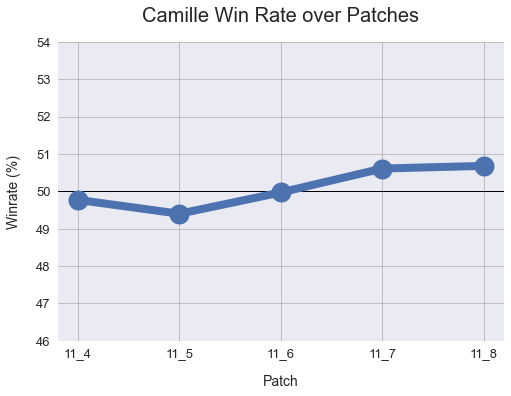

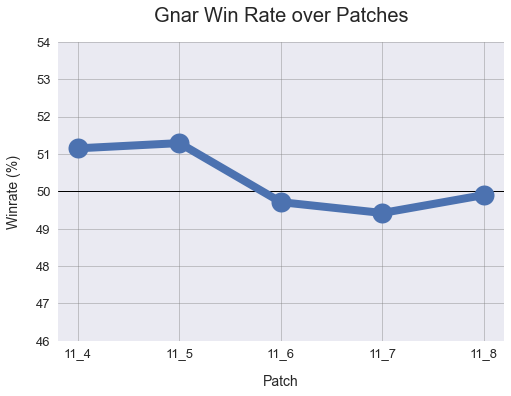

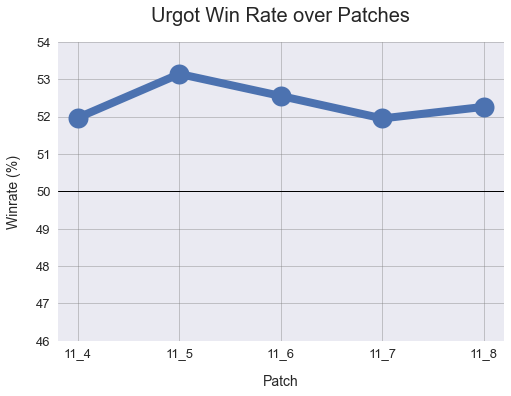

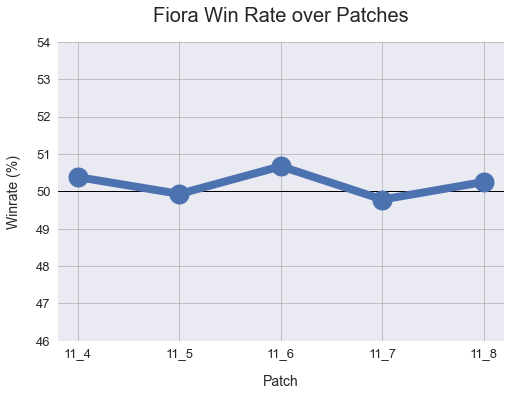

In [4]:
# Function that plots a champ's winrate over the last 5 patches. Includes title and labels
# as well as data points

def plot_champ(champ):
    x = patches5
    y = champs_wrs[champ]
    plt.style.use('seaborn')
    plt.ylim(bottom = 46, top = 54)
    plt.title(f'{champ.capitalize()} Win Rate over Patches', size = 20, pad = 20)
    plt.xlabel('Patch', size = 14, labelpad = 15)
    plt.ylabel('Winrate (%)', size = 14, labelpad = 15)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.locator_params(axis='y', nbins=10)
    plt.grid(color='#808080', alpha = 0.4)
    
    ynew = 50
    plt.axhline(ynew, color = 'k', linewidth = 1)
    
    plt.plot(x, y, linewidth = '8', marker = 'o', ms = 20)
    plt.show()

# Print out a graph for a specific champ
# plot_champ('seraphine')

# Print out a graph for all champs
for champ in champs:
    plot_champ(champ)

## Plot Champs on one graph

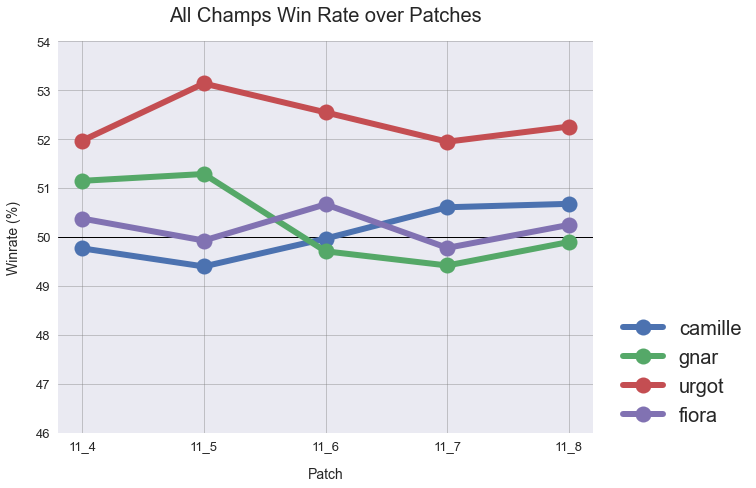

In [5]:
# Function that plots every champ and their winrate in a single graph over each patch.
def plot_champ_all(champs):
    
    x = patches5
    plt.style.use('seaborn')
    plt.figure(figsize=(9.6,7.2)) 
    plt.ylim(bottom = 46, top = 54)
    plt.title('All Champs Win Rate over Patches', size = 20, pad = 20)
    plt.xlabel('Patch', size = 14, labelpad = 15)
    plt.ylabel('Winrate (%)', size = 14, labelpad = 15)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.locator_params(axis = 'y', nbins = 10)
    plt.grid(color='#808080', alpha = 0.4)
    
    ynew = 50
    plt.axhline(ynew, color = 'k', linewidth = 1)
    
    for champ in champs:
        y = champs_wrs[champ]
        plt.plot(x, y, linewidth = '6', marker = 'o', ms = 16, label = champ)
        
    plt.legend(loc=(1.04,0), prop={'size': 20}, fontsize='small')
    plt.show()
    
plot_champ_all(champs)
